In [1]:
"""
LEME - Sprint 2, Dia 4: Modelo de Regressão
Google Colab

Objetivo: Prever taxa de conclusão do usuário
Features: área + acessibilidade + tempo + módulos
"""

import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# ============================================
# 1. CARREGAR DADOS
# ============================================

df = pd.read_csv('leme_dataset.csv')

print("="*60)
print("📈 MODELO DE REGRESSÃO - LEME")
print("="*60)
print(f"\n📊 Dataset: {df.shape}")

📈 MODELO DE REGRESSÃO - LEME

📊 Dataset: (1000, 7)


In [5]:
# ============================================
# 2. PREPARAR FEATURES (usar mesmos encoders)
# ============================================

print("\n2️⃣ PREPARANDO FEATURES")

# Carregar encoders salvos para manter consistência
with open('leme_encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

le_area = encoders['area']
le_acess = encoders['acessibilidade']
features = encoders['features']

df_model = df.copy()

# Aplicar transformações
df_model['area_encoded'] = le_area.transform(df_model['area'])
df_model['acess_encoded'] = le_acess.transform(df_model['acessibilidade'])

# Features (X) e Target (y)
X = df_model[features]
y = df_model['taxa_conclusao']  # TARGET: prever taxa de conclusão

print(f"✅ Features: {features}")
print(f"✅ Target: taxa_conclusao")
print(f"\n📊 Estatísticas do target:")
print(y.describe())


2️⃣ PREPARANDO FEATURES
✅ Features: ['area_encoded', 'acess_encoded', 'modulos_concluidos', 'tempo_plataforma_dias']
✅ Target: taxa_conclusao

📊 Estatísticas do target:
count    1000.000000
mean        0.683109
std         0.102490
min         0.358000
25%         0.614750
50%         0.692000
75%         0.757250
max         0.950000
Name: taxa_conclusao, dtype: float64


In [6]:
# ============================================
# 3. DIVIDIR TREINO E TESTE
# ============================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n📊 Divisão dos dados:")
print(f"  Treino: {X_train.shape[0]} usuários")
print(f"  Teste: {X_test.shape[0]} usuários")

# Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features normalizadas")


📊 Divisão dos dados:
  Treino: 800 usuários
  Teste: 200 usuários
✅ Features normalizadas


In [7]:
# ============================================
# 4. TREINAR MODELO
# ============================================

print("\n3️⃣ TREINANDO MODELO")

# Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

print("⏳ Treinando Random Forest Regressor...")
model.fit(X_train_scaled, y_train)

# Predições
y_pred = model.predict(X_test_scaled)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Treinamento concluído!")
print(f"\n📊 Métricas no teste:")
print(f"  RMSE (erro quadrático): {rmse:.4f}")
print(f"  MAE (erro absoluto): {mae:.4f}")
print(f"  R² Score: {r2:.3f}")


3️⃣ TREINANDO MODELO
⏳ Treinando Random Forest Regressor...
✅ Treinamento concluído!

📊 Métricas no teste:
  RMSE (erro quadrático): 0.0838
  MAE (erro absoluto): 0.0662
  R² Score: 0.315



4️⃣ VISUALIZAÇÕES


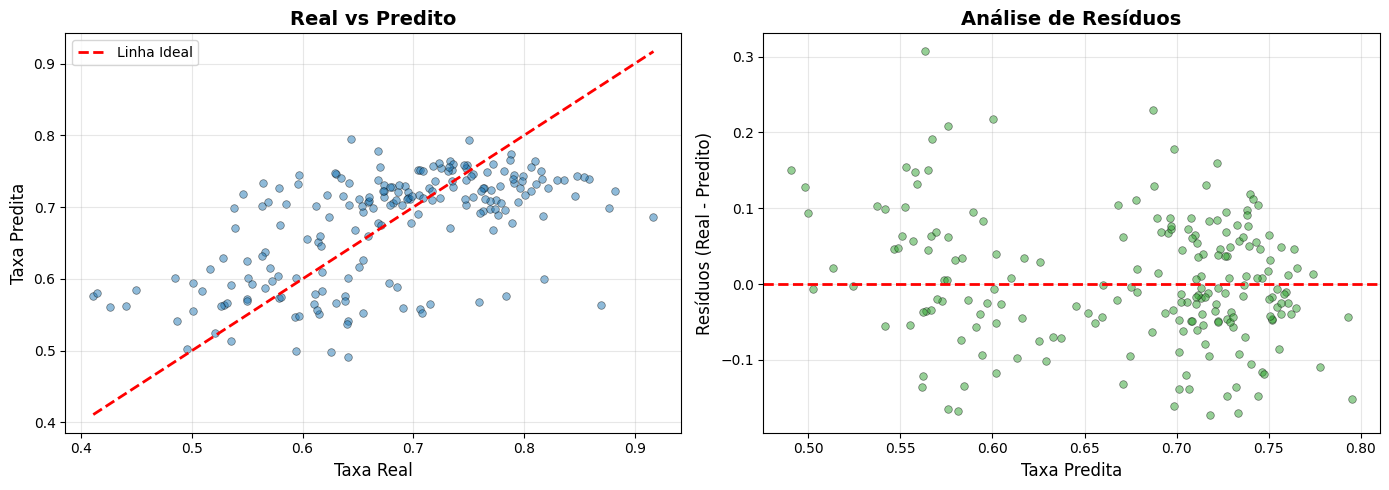

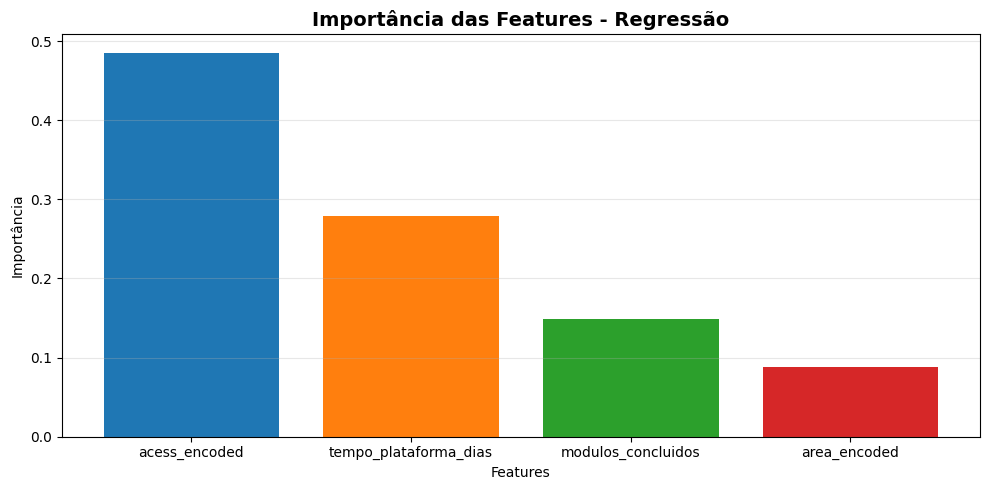


🔍 Ranking de Features:
  1. acess_encoded             - 0.485
  2. tempo_plataforma_dias     - 0.279
  3. modulos_concluidos        - 0.148
  4. area_encoded              - 0.088


In [8]:
# ============================================
# 5. VISUALIZAR RESULTADOS
# ============================================

print("\n4️⃣ VISUALIZAÇÕES")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Real vs Predito
axes[0].scatter(y_test, y_pred, alpha=0.5, s=30, color='#1f77b4', edgecolors='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Linha Ideal')
axes[0].set_xlabel('Taxa Real', fontsize=12)
axes[0].set_ylabel('Taxa Predita', fontsize=12)
axes[0].set_title('Real vs Predito', fontweight='bold', fontsize=14)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Resíduos
residuos = y_test - y_pred
axes[1].scatter(y_pred, residuos, alpha=0.5, s=30, color='#2ca02c', edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1].set_xlabel('Taxa Predita', fontsize=12)
axes[1].set_ylabel('Resíduos (Real - Predito)', fontsize=12)
axes[1].set_title('Análise de Resíduos', fontweight='bold', fontsize=14)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.bar(range(len(features)), importances[indices], color=colors)
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=0)
plt.title('Importância das Features - Regressão', fontweight='bold', fontsize=14)
plt.ylabel('Importância')
plt.xlabel('Features')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 Ranking de Features:")
for i in range(len(features)):
    print(f"  {i+1}. {features[indices[i]]:25} - {importances[indices[i]]:.3f}")

In [9]:
# ============================================
# 6. ANÁLISE DE EQUIDADE
# ============================================

print("\n5️⃣ ANÁLISE DE EQUIDADE")

df_test = df_model.iloc[X_test.index].copy()
df_test['taxa_predita'] = y_pred
df_test['erro_abs'] = np.abs(y_test.values - y_pred)

# Erro por grupo de acessibilidade
com_acess = df_test[df_test['acessibilidade'] != 'nenhuma']
sem_acess = df_test[df_test['acessibilidade'] == 'nenhuma']

mae_com = com_acess['erro_abs'].mean()
mae_sem = sem_acess['erro_abs'].mean()
diff_mae = abs(mae_com - mae_sem)

print(f"\n⚖️ Erro Médio Absoluto por grupo:")
print(f"  COM acessibilidade: {mae_com:.4f}")
print(f"  SEM acessibilidade: {mae_sem:.4f}")
print(f"  Diferença: {diff_mae:.4f}")

if diff_mae < 0.03:
    print("✅ Modelo equilibrado (diferença <0.03)")
elif diff_mae < 0.05:
    print("⚠️ Atenção: diferença moderada (0.03-0.05)")
else:
    print("❌ ALERTA: Possível viés nos erros (>0.05)")


5️⃣ ANÁLISE DE EQUIDADE

⚖️ Erro Médio Absoluto por grupo:
  COM acessibilidade: 0.0780
  SEM acessibilidade: 0.0601
  Diferença: 0.0179
✅ Modelo equilibrado (diferença <0.03)


In [10]:
# ============================================
# 7. SALVAR MODELO
# ============================================

print("\n6️⃣ SALVANDO MODELO")

with open('leme_modelo_regressao.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('leme_scaler_reg.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Arquivos salvos:")
print("  - leme_modelo_regressao.pkl")
print("  - leme_scaler_reg.pkl")


6️⃣ SALVANDO MODELO
✅ Arquivos salvos:
  - leme_modelo_regressao.pkl
  - leme_scaler_reg.pkl


In [12]:
# ============================================
# 8. TESTE PRÁTICO
# ============================================

print("\n7️⃣ TESTE PRÁTICO")

def prever_taxa(area, acessibilidade, modulos=0, tempo=0):
    """Prevê taxa de conclusão"""
    perfil = {
        'area_encoded': le_area.transform([area])[0],
        'acess_encoded': le_acess.transform([acessibilidade])[0],
        'modulos_concluidos': modulos,
        'tempo_plataforma_dias': tempo
    }

    X_perfil = np.array([[perfil[f] for f in features]])
    X_perfil_scaled = scaler.transform(X_perfil)

    taxa = model.predict(X_perfil_scaled)[0]
    return max(0.0, min(1.0, taxa))  # Limitar entre 0 e 1

# Teste 1: Advogado cego novo
print("\n📋 Teste 1: Advogado Cego (Novo)")
taxa1 = prever_taxa('Advogado', 'cego')
print(f"  Taxa prevista: {taxa1:.1%}")

# Teste 2: Designer com Libras em progresso
print("\n📋 Teste 2: Designer Libras (3 módulos)")
taxa2 = prever_taxa('Design', 'libras', modulos=3, tempo=20)
print(f"  Taxa prevista: {taxa2:.1%}")

# Teste 3: Logística sem acessibilidade avançado
print("\n📋 Teste 3: Logística Sem Acessibilidade (8 módulos)")
taxa3 = prever_taxa('Logistica', 'nenhuma', modulos=8, tempo=60)
print(f"  Taxa prevista: {taxa3:.1%}")

# Teste 4: Soft Skills cego iniciante
print("\n📋 Teste 4: Soft Skills Cego")
taxa4 = prever_taxa('SoftSkills', 'cego', modulos=1, tempo=5)
print(f"  Taxa prevista: {taxa4:.1%}")

print("\n✅ MODELO DE REGRESSÃO PRONTO!")


7️⃣ TESTE PRÁTICO

📋 Teste 1: Advogado Cego (Novo)
  Taxa prevista: 51.3%

📋 Teste 2: Designer Libras (3 módulos)
  Taxa prevista: 60.4%

📋 Teste 3: Logística Sem Acessibilidade (8 módulos)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  Taxa prevista: 74.1%

📋 Teste 4: Soft Skills Cego
  Taxa prevista: 60.6%

✅ MODELO DE REGRESSÃO PRONTO!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
